In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [3]:
def draw_polygon(polygon, s="x"):
    vis = Visualizer()
    vis.add_title(s)
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [4]:
def draw_polygon_colors(polygon,colors, s="x"):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    vis.add_title(s)
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [5]:
def draw_polygon_tri(polygon,tri):
    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

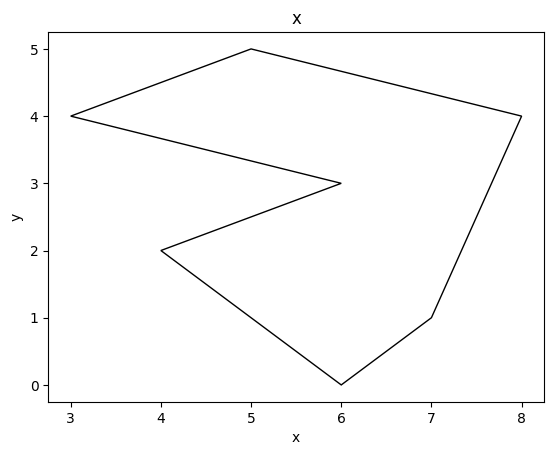

In [6]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [7]:
polygon = [(0,0), (2,0), (1,1)] # your polygon

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [8]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    def det(a, b, c):
        return (a[0]-c[0]) * (b[1]-c[1]) - (b[0]-c[0]) * (a[1]-c[1])
    
    def separative_or_connective(a, b, c, eps=10**(-12)):
        matdet = det(a, b, c)
        # separative - both neighbours are lower and inner angle > pi
        if b[1] > a[1] and b[1] > c[1] and matdet < -eps:
            return True
        # connective - both neighbours are higher and inner angle > pi
        if b[1] < a[1] and b[1] < c[1] and matdet < -eps:
            return True
        return False

    for p in range(len(polygon)-1):
        if separative_or_connective(polygon[p-1], polygon[p], polygon[p+1]):
            return False
    if separative_or_connective(polygon[-2], polygon[-1], polygon[0]):
        return False
    return True
        

Przeprowadź test poprawności powyższej funkcji.

In [9]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Sprawdź monotoniczność swojego wielokątu.

In [10]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

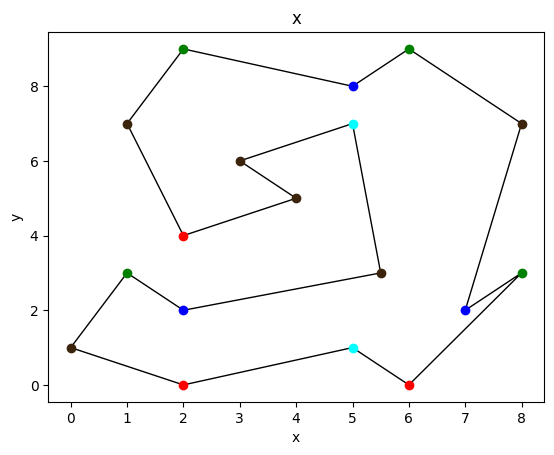

In [11]:
draw_polygon_colors(polygon_example_2, polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [12]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    def det(a, b, c):
        return (a[0]-c[0]) * (b[1]-c[1]) - (b[0]-c[0]) * (a[1]-c[1])
        
    def classify(a, b, c, eps=10**(-12)):
        matdet = det(a, b, c)
        # starting or separative
        if a[1] < b[1] and c[1] < b[1]:
            # starting
            if matdet > eps:
                return 0
            # separative
            elif matdet < -eps:
                return 3
        # closing or connective
        elif a[1] > b[1] and c[1] > b[1]:
            # closing
            if matdet > eps:
                return 1
            # connective
            elif matdet < -eps:
                return 2
        # correct
        else:
            return 4
        
    result = [-1 for _ in range(len(polygon))]
    for i in range(len(polygon)-1):
        result[i] = classify(polygon[i-1], polygon[i], polygon[i+1])
    result[-1] = classify(polygon[-2], polygon[-1], polygon[0])
    return result

Przeprowadź test poprawności powyższej funkcji. 

In [13]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

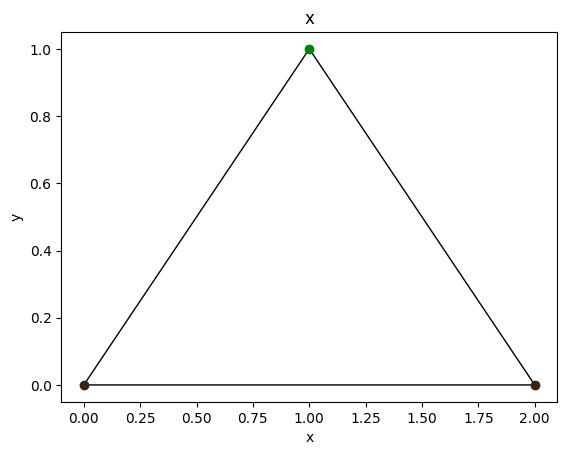

In [14]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

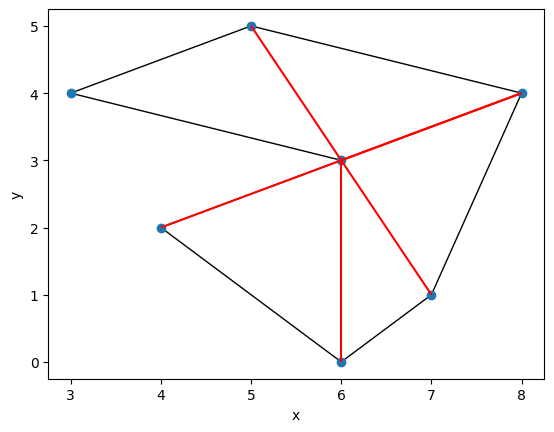

In [15]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [16]:
def triangulation(polygon, eps=10**(-12)):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    def det(a, b, c):
        return (a[0]-c[0]) * (b[1]-c[1]) - (b[0]-c[0]) * (a[1]-c[1])
    
    def to_sides(polygon):
        n = len(polygon)
        top = polygon.index(max(polygon, key= lambda x: x[1]))
        bottom = polygon.index(min(polygon, key= lambda x: x[1]))
        left = set()
        right = set()
        i = top
        while i != bottom:
            left.add(i)
            i = (i+1)%n
        while i != top:
            right.add(i)
            i = (i+1)%n
        return left, right

    def if_same_side(p1, p2):
       return (p1 in left and p2 in left) or (p1 in right and p2 in right)

    def if_inner_triangle(a, b, c):
        if b[2] in left:
            return det(a, b, c) > eps
        return det(a, b, c) < -eps

    def if_neighbours(a, b):
        return abs(a - b) in [1, len(polygon)-1]
    
    if not is_y_monotonic:
        return None
    
    #raw_polygon = []
    #for i in range(len(polygon)):
    #    raw_polygon.append((polygon[i], polygon[i-1]))
    
    polygon = [(x,y,i) for i, (x,y) in enumerate(polygon)]
    left, right = to_sides(polygon)
    polygon.sort(key=lambda x: x[1], reverse=True)
    
    stack = [polygon[0], polygon[1]]
    diagonals = []
    for x,y,i in polygon[2:]:
        if if_same_side(stack[-1][2], i):
            while len(stack)>1 and if_inner_triangle(stack[-2], stack[-1], (x,y,i)):
                if not if_neighbours(i, stack[-2][2]):
                    diagonals.append((i, stack[-2][2]))
                stack.pop()
            stack.append((x,y,i))
        else:
            for p in stack:
                if not if_neighbours(p[2], i):
                    diagonals.append((p[2], i))
            stack = [stack[-1], (x,y,i)]

    return diagonals
    #raw_polygon = []
    #for i in range(len(polygon)):
    #    raw_polygon.append((polygon[i-1], polygon[i]))
    #return diagonals, raw_polygon
    

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [17]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.031s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

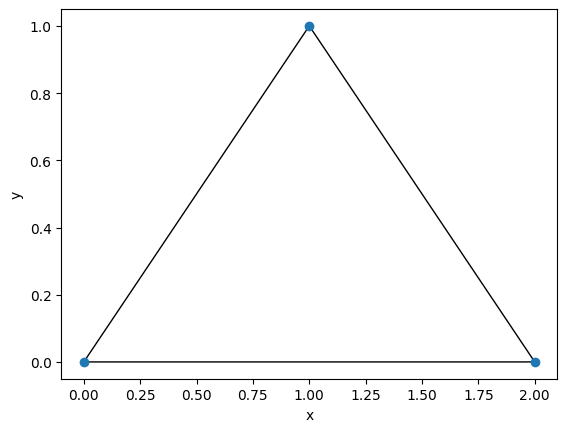

In [18]:
tri = triangulation(polygon)
draw_polygon_tri(polygon,tri)

Kody do wizualizacji

In [19]:
def save_y_monotonic(polygon):
    def det(a, b, c):
        return (a[0]-c[0]) * (b[1]-c[1]) - (b[0]-c[0]) * (a[1]-c[1])
    
    def separative_or_connective(a, b, c, eps=10**(-12)):
        matdet = det(a, b, c)
        # separative - both neighbours are lower and inner angle > pi
        if b[1] > a[1] and b[1] > c[1] and matdet < -eps:
            return True
        # connective - both neighbours are higher and inner angle > pi
        if b[1] < a[1] and b[1] < c[1] and matdet < -eps:
            return True
        return False

    for p in range(len(polygon)-1):
        if separative_or_connective(polygon[p-1], polygon[p], polygon[p+1]):
            draw_polygon(polygon, "Wielokąt nie y-monotoniczny")
            return False
    if separative_or_connective(polygon[-2], polygon[-1], polygon[0]):
        draw_polygon(polygon, "Wielokąt nie y-monotoniczny")
        return False
    draw_polygon(polygon, "Wielokąt y-monotoniczny")
    return True


Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.156s


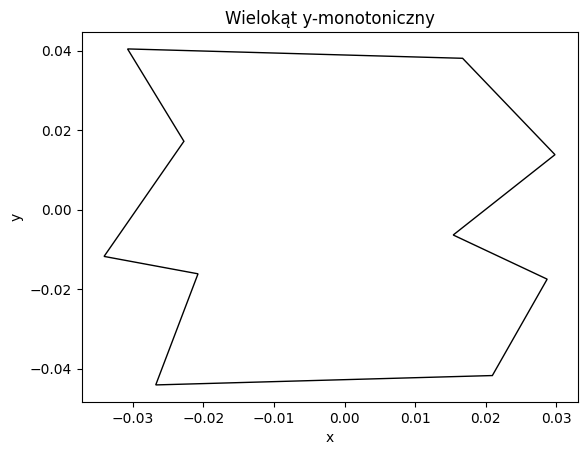

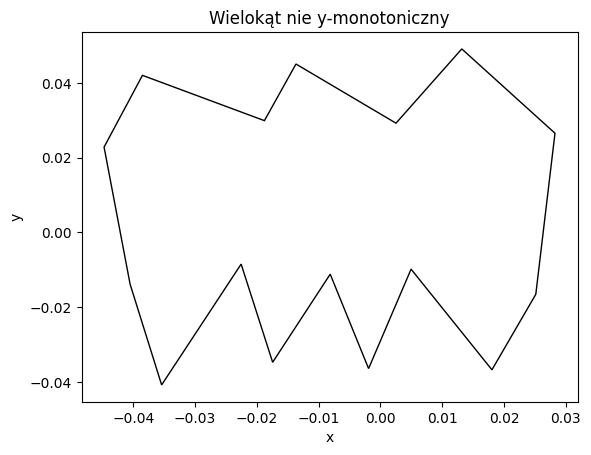

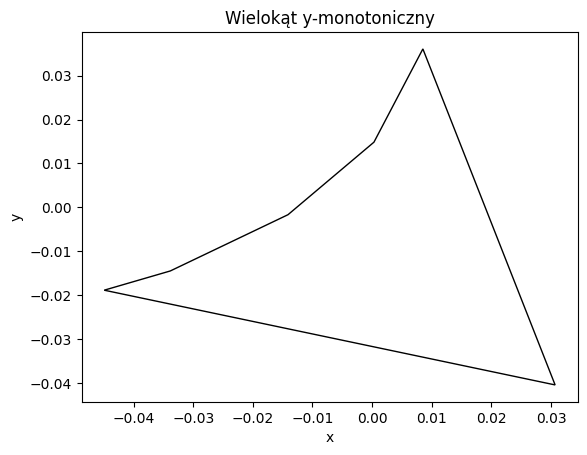

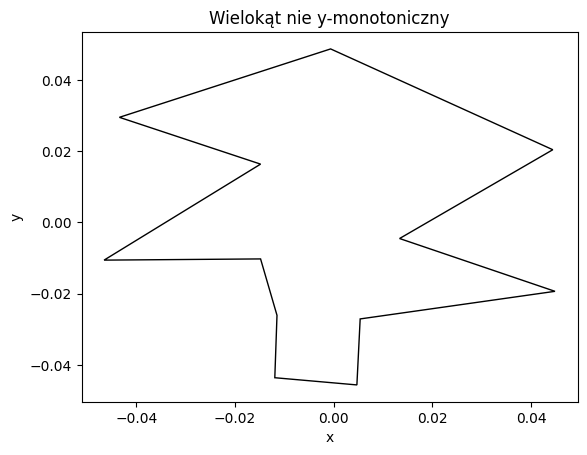

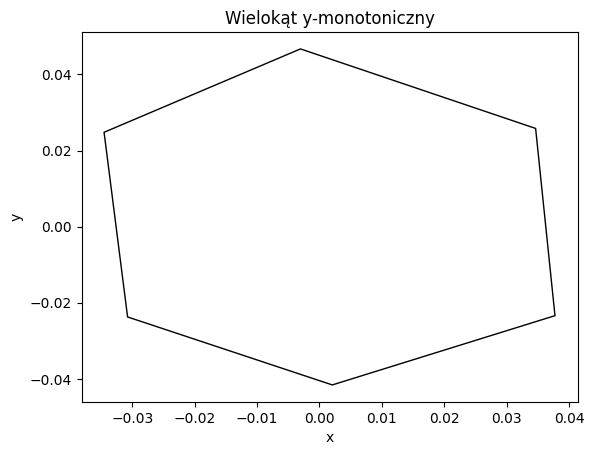

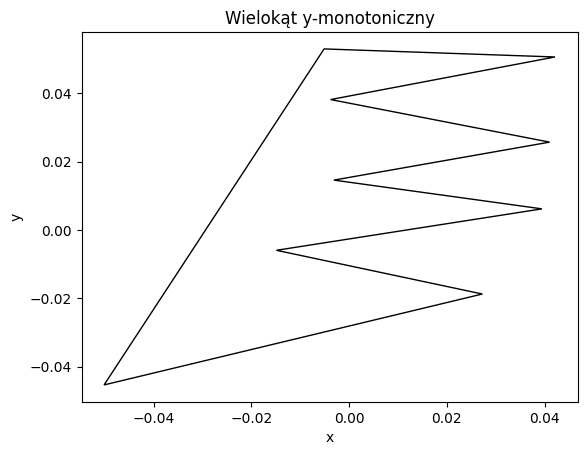

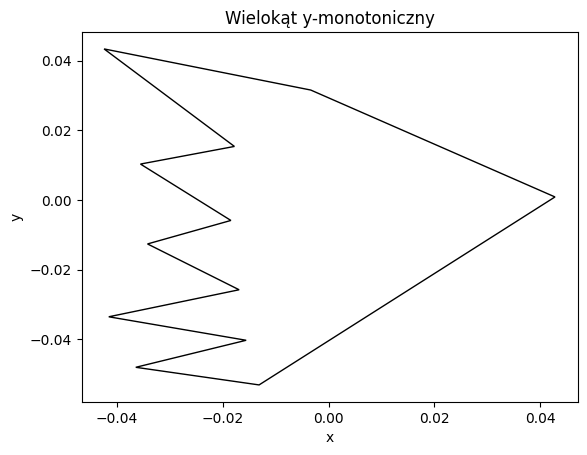

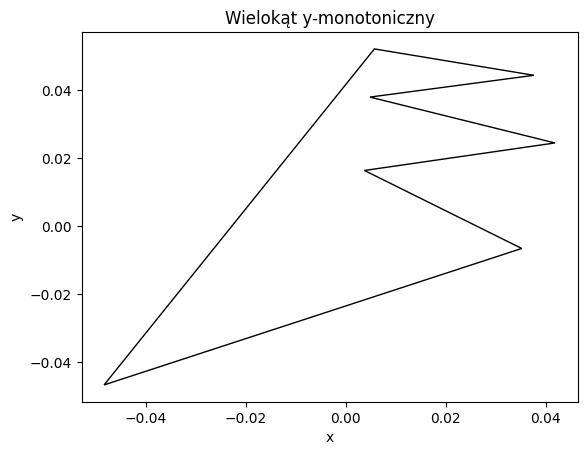

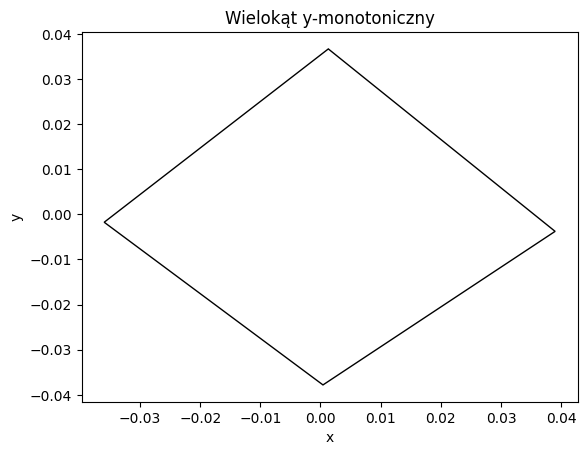

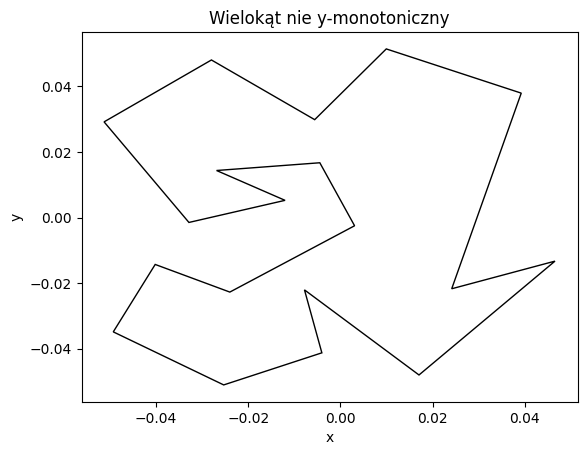

In [20]:
Test().runtest(1, save_y_monotonic)

In [21]:
def save_color_vertex(polygon):

    def det(a, b, c):
        return (a[0]-c[0]) * (b[1]-c[1]) - (b[0]-c[0]) * (a[1]-c[1])
        
    def classify(a, b, c, eps=10**(-12)):
        # starting or separative
        if a[1] < b[1] and c[1] < b[1]:
            # starting
            if det(a, b, c) > eps:
                return 0
            # separative
            elif det(a, b, c) < -eps:
                return 3
        # closing or connective
        elif a[1] > b[1] and c[1] > b[1]:
            # closing
            if det(a, b, c) > eps:
                return 1
            # connective
            elif det(a, b, c) < -eps:
                return 2
        # correct
        else:
            return 4
        
    result = [-1 for _ in range(len(polygon))]
    for i in range(len(polygon)-1):
        result[i] = classify(polygon[i-1], polygon[i], polygon[i+1])
    result[-1] = classify(polygon[-2], polygon[-1], polygon[0])
    draw_polygon_colors(polygon, result, "Klasyfikacja wierzchołków")
    return result

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.219s


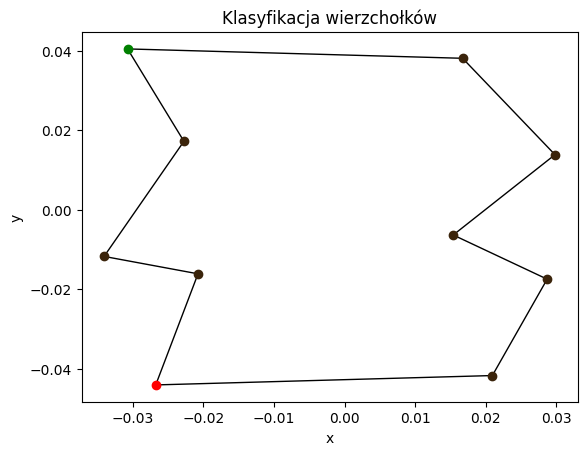

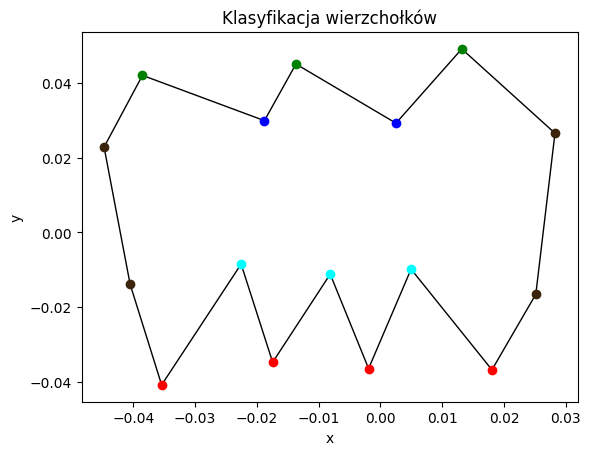

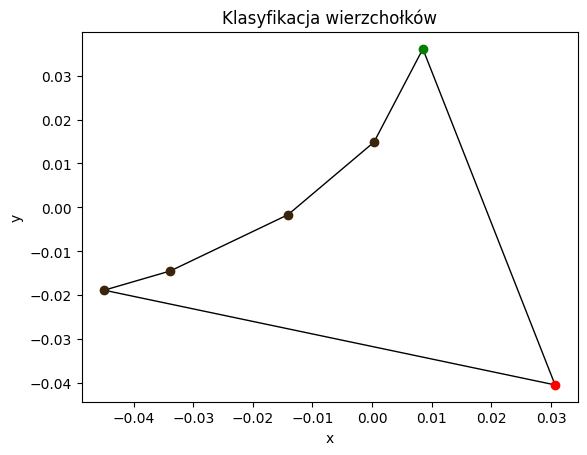

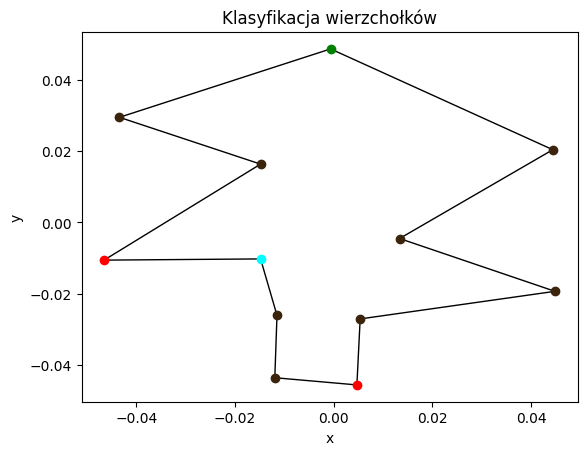

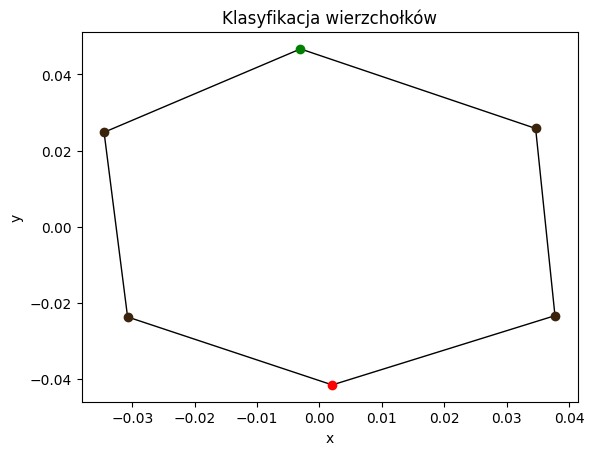

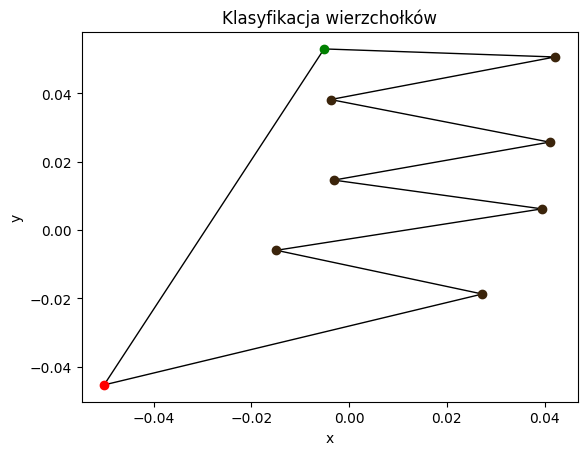

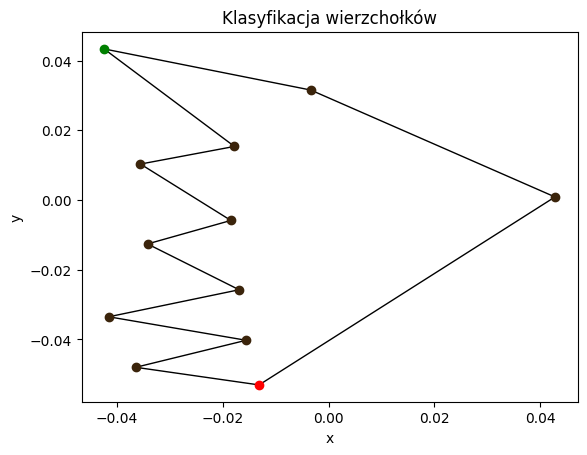

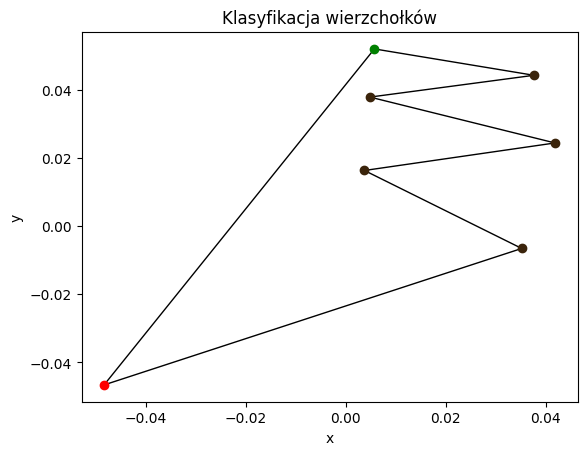

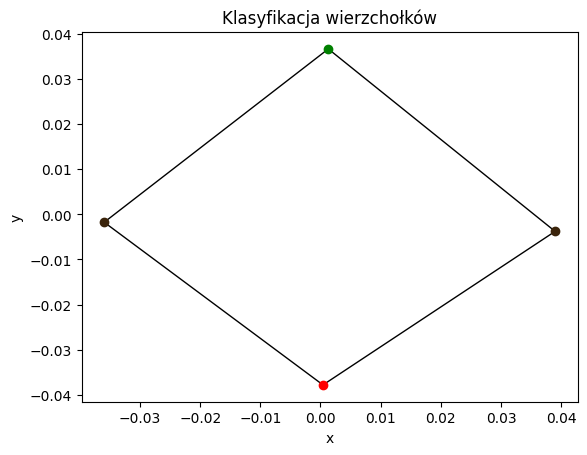

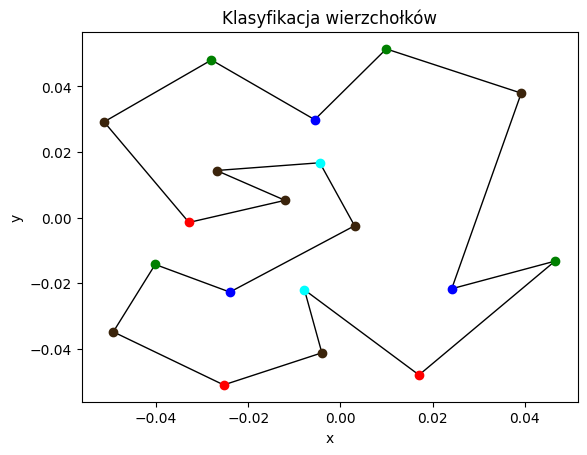

In [22]:
Test().runtest(2, save_color_vertex)

In [23]:
glob = 1
def draw_triangulation(polygon, eps=10**(-12)):
    global glob
    vis = Visualizer()
    vis.add_title("Triangulacja wielokąta")
    vis.add_polygon(polygon, fill=None)
    from collections import deque
    stage = deque()
    
    def det(a, b, c):
        return (a[0]-c[0]) * (b[1]-c[1]) - (b[0]-c[0]) * (a[1]-c[1])
    
    def to_sides(polygon):
        n = len(polygon)
        top = polygon.index(max(polygon, key= lambda x: x[1]))
        bottom = polygon.index(min(polygon, key= lambda x: x[1]))
        left = set()
        right = set()
        i = top
        while i != bottom:
            left.add(i)
            i = (i+1)%n
        while i != top:
            right.add(i)
            i = (i+1)%n
        return left, right

    def if_same_side(p1, p2):
       return (p1 in left and p2 in left) or (p1 in right and p2 in right)

    def if_inner_triangle(a, b, c):
        if b[2] in left:
            return det(a, b, c) > eps
        return det(a, b, c) < -eps

    def if_neighbours(a, b):
        if abs(a - b) == 1 or abs(a - b) == len(polygon) - 1:
            return True
        return False
    
    if not is_y_monotonic:
        return None
    polygon = [(x,y,i) for i, (x,y) in enumerate(polygon)]
    left, right = to_sides(polygon)
    polygon.sort(key=lambda x: x[1], reverse=True)
    
    stack = [polygon[0], polygon[1]]
    stage.append(vis.add_point(polygon[0][:2], color='orange'))
    stage.append(vis.add_point(polygon[1][:2], color='orange'))
    diagonals = []
    for x,y,i in polygon[2:]:
        q = vis.add_point((x,y), color='blue')
        if if_same_side(stack[-1][2], i):
            while len(stack)>1 and if_inner_triangle(stack[-2], stack[-1], (x,y,i)):
                if not if_neighbours(i, stack[-2][2]):
                    diagonals.append((i, stack[-2][2]))
                    vis.add_point(((x,y), stack[-2][:2]), color='red')
                    vis.add_line_segment(((x,y), stack[-2][:2]), color='red')
                stack.pop()
                vis.remove_figure(stage.pop())
            stack.append((x,y,i))
            stage.append(vis.add_point((x,y), color='orange'))
        else:
            for p in stack:
                if not if_neighbours(p[2], i):
                    diagonals.append((p[2], i))
                    vis.add_point(((x,y), p[:2]), color='red')
                    vis.add_line_segment(((x,y), p[:2]), color='red')
                vis.remove_figure(stage.pop())
            r = stack[-1]
            stack = [r, (x,y,i)]
            stage.append(vis.add_point((x,y), color='orange'))
            stage.append(vis.add_point(r[:2], color='orange'))
        vis.remove_figure(q)   
    #vis.save_gif(filename=str(glob), interval=300)
    glob+=1
    return diagonals

In [24]:
Test().runtest(3, draw_triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


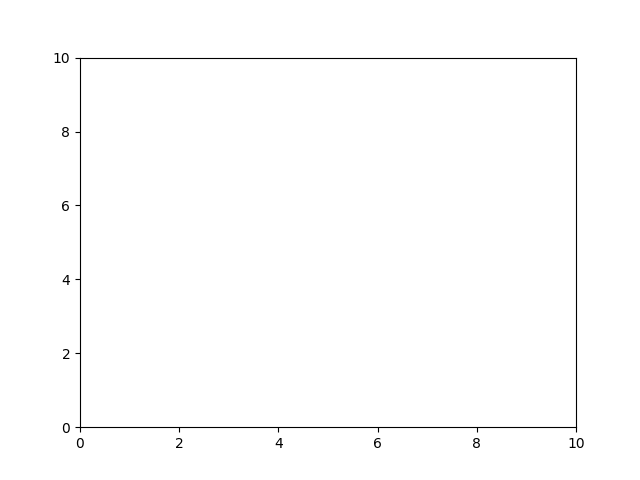

In [25]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0,10])
ax.set_ylim([0,10])

given_polygon = []
points_x = []
points_y = []
eps = 0.1
finished = False
xd = 0

def onclick(event):
    global finished, given_polygon
    if len(points_x)>0 and abs(points_x[0] - event.xdata) < eps and abs(points_y[0] - event.ydata) < eps:
        given_polygon = list(zip(points_x, points_y))
        points_x.append(points_x[0])
        points_y.append(points_y[0])
        finished = True
    if not finished:
        points_x.append(event.xdata)
        points_y.append(event.ydata)
        col = 'blue'
    else:
        col = 'green'
    xd += 1
    plt.plot(points_x, points_y, '.', c=col)
    plt.plot(points_x, points_y, c=col)
    fig.canvas.draw()
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [26]:
print(given_polygon)

[]
